![Elevvo Pathways](https://elevvo.tech/assets/nav_logo-5vkEKoZL.svg)
<h1>Time Series Breakdown of Retail Sales</h1>

In this notebook, we are processing <code>train.csv</code> from the Walmart Sales Forecasting dataset.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

After importing all necessary modules, we have to find the weekly aggregation of sales in our dataset. To do this, we will use <code>df['Weekly_Sales'].resample('W').sum()</code>. Afterwards, it will become simple to implement a time series breakdown (Trend, Seasonal, Residual) using the <code>seasonal_decompose</code> function offered by the statsmodel module.

In [ ]:
df = pd.read_csv('dataset.csv', parse_dates=['Date'])
df = df.set_index('Date')
total_weekly_sales = df['Weekly_Sales'].resample('W').sum()

Date
2010-02-07    49750740.50
2010-02-14    48336677.63
2010-02-21    48276993.78
2010-02-28    43968571.13
2010-03-07    46871470.30
                 ...     
2012-09-30    43734899.40
2012-10-07    47566639.31
2012-10-14    46128514.25
2012-10-21    45122410.57
2012-10-28    45544116.29
Freq: W-SUN, Name: Weekly_Sales, Length: 143, dtype: float64

<Figure size 5000x600 with 0 Axes>

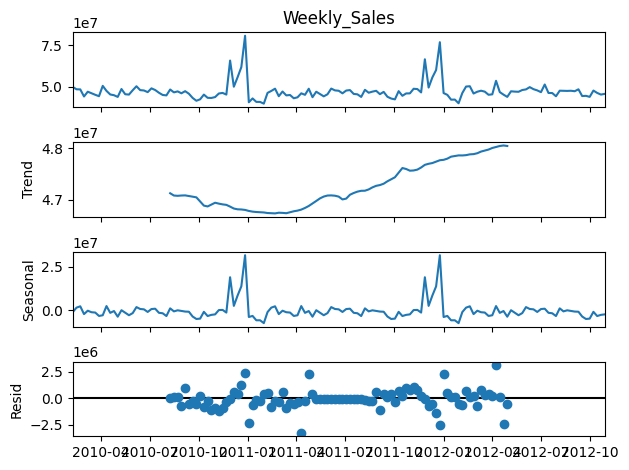

In [ ]:
decomposition = seasonal_decompose(total_weekly_sales, model='additive')
decomposition.plot()
plt.show()

Now, we have the Observed, Trend, Seasonal and Residual plots or the Time Series Breakdown.

<h2>Moving Average</h2>

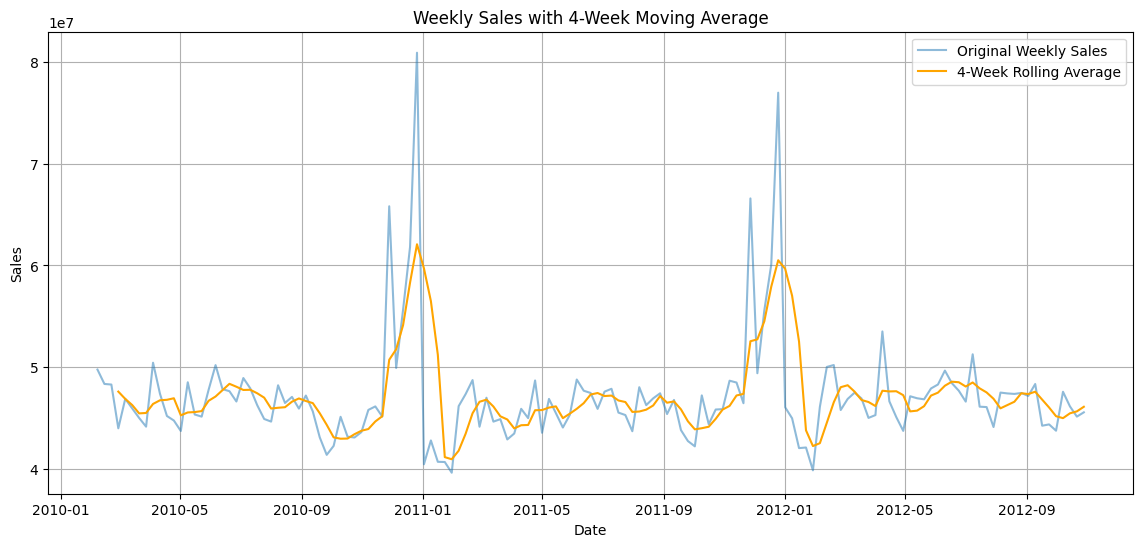

In [ ]:
rolling_average = total_weekly_sales.rolling(window=4).mean()

plt.figure(figsize=(14, 6))
sns.lineplot(data=total_weekly_sales, label='Original Weekly Sales', alpha=0.5)
sns.lineplot(data=rolling_average, label='4-Week Rolling Average', color='orange')
plt.title('Weekly Sales with 4-Week Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

Therefore, we have found the moving average of our dataset which smoothes out the dataset and minimizes noise. This helps us find trends within the time period.

<h2>Forecast Data with Exponential Smoothing</h2>

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(
    total_weekly_sales,
    trend='add',
    seasonal='add',
    seasonal_periods=7
).fit()

In [ ]:
forecast = model.forecast(7)
plt.figure(figsize=(14,6))
plt.plot(total_weekly_sales, label='Historical Daily Sales')
plt.plot(forecast, label='7-Day ETS Forecast', linestyle='--')
plt.title('Daily Sales with 7-Day Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()